In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# -- assignment 1 --
import numpy as np
from urllib import request
import gzip
import pickle
import os

def load_synth(num_train=60_000, num_val=10_000, seed=0):
    """
    Load some very basic synthetic data that should be easy to classify. Two features, so that we can plot the
    decision boundary (which is an ellipse in the feature space).

    :param num_train: Number of training instances
    :param num_val: Number of test/validation instances
    :param num_features: Number of features per instance

    :return: Two tuples and an integer: (xtrain, ytrain), (xval, yval), num_cls. The first contains a matrix of training
     data with 2 features as a numpy floating point array, and the corresponding classification labels as a numpy
     integer array. The second contains the test/validation data in the same format. The last integer contains the
     number of classes (this is always 2 for this function).
    """
    np.random.seed(seed)

    THRESHOLD = 0.6
    quad = np.asarray([[1, -0.05], [1, .4]])

    ntotal = num_train + num_val

    x = np.random.randn(ntotal, 2)

    # compute the quadratic form
    q = np.einsum('bf, fk, bk -> b', x, quad, x)
    y = (q > THRESHOLD).astype(np.int)

    return (x[:num_train, :], y[:num_train]), (x[num_train:, :], y[num_train:]), 2

def load_mnist(final=False, flatten=True):
    """
    Load the MNIST data.

    :param final: If true, return the canonical test/train split. If false, split some validation data from the training
       data and keep the test data hidden.
    :param flatten: If true, each instance is flattened into a vector, so that the data is returns as a matrix with 768
        columns. If false, the data is returned as a 3-tensor preserving each image as a matrix.

    :return: Two tuples and an integer: (xtrain, ytrain), (xval, yval), num_cls. The first contains a matrix of training
     data and the corresponding classification labels as a numpy integer array. The second contains the test/validation
     data in the same format. The last integer contains the number of classes (this is always 2 for this function).

     """

    if not os.path.isfile('mnist.pkl'):
        init()

    xtrain, ytrain, xtest, ytest = load()
    xtl, xsl = xtrain.shape[0], xtest.shape[0]

    if flatten:
        xtrain = xtrain.reshape(xtl, -1)
        xtest  = xtest.reshape(xsl, -1)

    if not final: # return the flattened images
        return (xtrain[:-5000], ytrain[:-5000]), (xtrain[-5000:], ytrain[-5000:]), 10

    return (xtrain, ytrain), (xtest, ytest), 10

# Numpy-only MNIST loader. Courtesy of Hyeonseok Jung
# https://github.com/hsjeong5/MNIST-for-Numpy

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

In [3]:
def static_initialization_parameters():
    "Initialization function for Q3"
    
    w1 = [[1., 1., 1.], [-1., -1., -1.]]
    w2 = [[1., 1.], [-1., -1.], [-1., -1.]]
    
    b1 = [0.0, 0.0, 0.0]
    b2 = [0.0, 0.0]
    
    x = [1., -1.]
    y = [1., 0.]
    
    parameters = {"W1": w1,
                  "b1": b1,
                  "W2": w2,
                  "b2": b2,
                  "x":x,
                  "y":y
                }
    
    return parameters  

def normal_random_parameters():
    "Random initialization function for Q4"
    
    w1 = [[-.6851, -.7245, -.5344], [.7106, -1.4666, 1.7060]]
    w2 = [[1.0958, -2.6829], [2.2287, 7.6796], [.9236, -.6964]]
    
    b1 = [0.0, 0.0, 0.0]
    b2 = [0.0, 0.0]
    
    
    parameters = {"W1": w1,
                  "b1": b1,
                  "W2": w2,
                  "b2": b2
                }
    
    return parameters  

def initialize_parameters(n_x, n_h, n_y):
    "Random initialization for a network of 1 hidden layer"
    W1 = np.random.randn(n_h, n_x)* .01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)* .01
    b2 = np.zeros((n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [4]:
class Sigmoid(object):
    
    def forward(x):
        sigx = 1. / (1. + math.exp(-x))

        return sigx
    
    def backward(dA):
        
        return Sigmoid.forward(dA) * (1 - Sigmoid.forward(dA))
        
    def Tforward(X):
        sigx = 1/(1 + np.exp(-X))
        
        return sigx
    
    def Tbackward(dA):
        sigA = Sigmoid.Tforward(dA)
        
        return np.multiply(sigA, (np.subtract(1, sigA)))
    

class Softmax(object):
    
    def forward(x):
        "Compute softmax values for list x"
        softx = []
        x_exponents = []
        for element in x:
            x_exponents.append(math.exp(element))
        
        for exponent in x_exponents:
            softx.append(exponent / sum(x_exponents))
        
        return softx
    
    def backward(A2, y):
        "compute derivatives for Yhat, given a list with clasification of true class"
        gradient = []
        true_index = 0
        for i in range(len(y)):
            if y[i] != 0:
                true_index = i
        
        for i in range(len(y)):
            if i == true_index:
                gradient.append(A2[i] - 1)
            else:
                gradient.append(A2[i])
                
        return gradient
    
    def Tforward(x):  
        "Softmax for given a numpy vector"
        e_x = np.exp(x - np.max(x))
        softx = e_x /e_x.sum()

        return softx
    
    def Tbackward(Y, target):
        "Derrivative for a prediction with respect to the input of a Softmax"
        y_j = -np.multiply(np.subtract(target, 1), Y.T)
        y_i = np.multiply((Y - 1).T, target)

        return y_j + y_i

        
class CrossEntropyLoss(object):
    
    def forward(yTarget,  yHat):
        for i in range(len(yTarget)):
            if yTarget[i] == 1:
                return -math.log(yHat[i])
    
    def backward(yTarget,  yHat):
        derivative = []
        for index in range(len(yTarget)):
            if yTarget[index] == 1:
                derivative.append(-1/(yHat[index]))
            else:
                derivative.append(0)
                
        return derivative
    
    def Tforward(yTarget,  yHat):

        return -np.log(np.multiply(yTarget, yHat).sum())
        
    
class Linear(object): 
                           
    def forward(A, W, b):
        Z = []
        
        for index, bias in enumerate(b):
            z = bias
            for i, feature in enumerate(A):
                z += feature * W[i][index]
            Z.append(z)

        return Z
    
    def backward(dZ, weights):
        dA = []
        
        for index, w in enumerate(weights):
            dA.append(dZ[0] * w[0] + dZ[1] * w[1])
            
        return dA

    def Tforward(A, W, b):
        "Linear forward pass given the an activated layer, weights and bias"
        z = np.matmul(W, A) + b

        return z
    
    def Tbackward(dZ, A, W, size):
        "Linear backward pass given activated layer from the forward pass, the weights and derivative uptill this layer"

        dW = np.matmul(dZ, A.T)/size
        db = np.sum(dZ, axis=1, keepdims=True)
        dA = np.matmul(W.T, dZ)
        
        return dA, dW, db
        
        
    


In [5]:
def forward(x, y, parameters):
    
    context = {}

    Z1 = Linear.forward(x, parameters["W1"], parameters["b1"])
    
    A1 = []
    
    for z in Z1:
        A1.append(Sigmoid.forward(z))
        
    Z2 = Linear.forward(A1, parameters["W2"], parameters["b2"])
    
    A2 = Softmax.forward(Z2)
    
    Loss = CrossEntropyLoss.forward(y, A2)

          
    context["Z1"] = Z1
    context["A1"] = A1
    context["Z2"] = Z2
    context["A2"] = A2
    context["loss"] = Loss
    
    return context

def backward(x, y, parameters, context):
 
    context["db2"] = context["dZ2"] = Softmax.backward(context["A2"], y)

    for index, a in enumerate(context["A1"]):
        context["dw2" + str(index + 1)] = [a * context["dZ2"][0], a * context["dZ2"][1]]
        
    context["dA1"] = Linear.backward(context["dZ2"], parameters["W2"])
    
    dZ1 = []
    
    for index, z in enumerate(context["Z1"]):
        dZ1.append(Sigmoid.backward(z) * context["dA1"][index])
        
    context["db1"] = context["dZ1"] = dZ1
    
    for index, inp in enumerate(x):
        context["dw1" + str(index + 1)] = [inp * context["dZ1"][0], inp * context["dZ1"][1], inp * context["dZ1"][2]]
        
    return context

def update_parameter(parameter_old, gradients, alpha):
    
    for i in range(len(parameter_old)):
        parameter_old[i] += -alpha * gradients[i]

    
    return parameter_old
         

In [221]:
# Q3
parameters = static_initialization_parameters()

context = forward(parameters["x"], parameters["y"], parameters)

context = backward(parameters["x"], parameters["y"], parameters, context)
print(context)

{'Z1': [2.0, 2.0, 2.0], 'A1': [0.8807970779778823, 0.8807970779778823, 0.8807970779778823], 'Z2': [-0.8807970779778823, -0.8807970779778823], 'A2': [0.5, 0.5], 'loss': 0.6931471805599453, 'db2': [-0.5, 0.5], 'dZ2': [-0.5, 0.5], 'dw21': [-0.44039853898894116, 0.44039853898894116], 'dw22': [-0.44039853898894116, 0.44039853898894116], 'dw23': [-0.44039853898894116, 0.44039853898894116], 'dA1': [0.0, 0.0, 0.0], 'db1': [0.0, 0.0, 0.0], 'dZ1': [0.0, 0.0, 0.0], 'dw11': [0.0, 0.0, 0.0], 'dw12': [-0.0, -0.0, -0.0]}


In [222]:
# Q4
(xtrain, ytrain), (xval, yval), num_cls = load_synth(60000, 100)
ybinairy = []
loss_average = []
N_average = 1000

for element in ytrain:
    if element == 1:
        ybinairy.append([1,0])
    else:
        ybinairy.append([0,1])

parameters = normal_random_parameters()
alpha = .05

for epoch in range(20):
    alpha -= .0022
    loss = []

    for observation in range(len(xtrain)):
        x = xtrain[observation]
        y = ybinairy[observation]
        
        context = forward(x, y, parameters)
        context = backward(x, y, parameters, context)

        for i in range(len(parameters["W2"])):
            parameters["W2"][i] = update_parameter(parameters["W2"][i], context["dw2" + str(i + 1)], alpha)

        
        parameters["b2"] = update_parameter(parameters["b2"], context["db2"], alpha)

        for i in range(len(parameters["W1"])):
            parameters["W1"][i] = update_parameter(parameters["W1"][i], context["dw1" + str(i + 1)], alpha)


        parameters["b1"] = update_parameter(parameters["b1"], context["db1"], alpha)

        loss.append(context["loss"])

    for i in range(len(loss)):
        if i % N_average == 0:
            loss_average.append(sum(loss[i:i+N_average])/N_average)
plt.plot('Observations in train data (*1000)', 'Mean crossentropy loss',loss_average)
plt.show


    


KeyboardInterrupt: 

<function matplotlib.pyplot.show(close=None, block=None)>

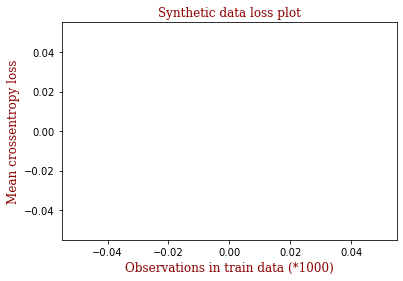

In [180]:
plt.plot(loss_average)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }
plt.title('Synthetic data loss plot', fontdict=font)
plt.xlabel('Observations in train data (*1000)', fontdict=font)
plt.ylabel('Mean crossentropy loss', fontdict=font)
plt.show

In [6]:
def Tforward(X, Y, parameters):
    X = X.T
    context = {}
    
    Z1 = Linear.Tforward(X, parameters["W1"], parameters["b1"])
    
    A1 = Sigmoid.Tforward(Z1)
        
    Z2 = Linear.Tforward(A1, parameters["W2"], parameters["b2"])
    
    A2 = Softmax.Tforward(Z2)

    context["Z1"] = Z1
    context["A1"] = A1
    context["Z2"] = Z2
    context["A2"] = A2

    return context

def Tbackward(X, Y, parameters, context, batch_size):

    dZ2 = Softmax.Tbackward(context["A2"], Y)

    dA1, dW2, db2 = Linear.Tbackward(dZ2.T, context["A1"], parameters["W2"], batch_size)


    dZ1 = Sigmoid.Tbackward(context["Z1"]) * dA1

    dX, dW1, db1 = Linear.Tbackward(dZ1, X.T, parameters["W1"], batch_size)

    
    context["db2"] = db2
    context["dW2"] = dW2
    context["db1"] = db1
    context["dW1"] = dW1
    
    return context

def Tupdate(parameters, gradients, alpha):

    parameters = parameters -  alpha * gradients
    return parameters


In [7]:
# Q5
# Preprocessin data
# Load data
(xtrain, ytrain), (xval, yval), num_cls = load_mnist()

# Get non zero indexes
Non_zero_index = []
for index, number in enumerate(xtrain.max(axis=0)):
    if number != 0:
        Non_zero_index.append(index)
# Remove zero rows
xtrain = xtrain[:,Non_zero_index]
xval = xval[:,Non_zero_index]

# Normalize train and validation set
xtrain = (xtrain - xtrain.min(axis=0))/(xtrain.max(axis=0) - xtrain.min(axis=0))
xval = (xval - xtrain.min(axis=0))/(xtrain.max(axis=0) - xtrain.min(axis=0))

# One hot encode
ytrain_onehot = np.zeros((55000, 10))
for index, y in enumerate(ytrain):
    ytrain_onehot[index][y] = 1
ytrain = ytrain_onehot

yval_onehot = np.zeros((55000, 10))
for index, y in enumerate(yval):
    yval_onehot[index][y] = 1
yval = yval_onehot

In [9]:
loss_models = []
epoch = 5
alpha = .001

batch_size = 1
learning_rate = alpha * batch_size
size = len(xtrain)
learning_rates = [.001, .003, .01, .03]
batches = size // batch_size
learning_rate = alpha * batch_size


# itterate over the data set
for index in range(5):
    loss = []
    # Initialize parameters
    parameters = initialize_parameters(len(xtrain[0]), 300, 10)
    learning_rate = learning_rate
    for e in range(epoch):
        permutation = np.random.permutation(size)

        xtrain = xtrain[permutation,:]
        ytrain = ytrain[permutation,:]
        
        for i in range(batches):
            ub = i * batch_size + batch_size
            lb = i * batch_size
            X = xtrain[lb:ub,:]
            Y = ytrain[lb:ub,:]
            context = Tforward(X, Y, parameters)
            context = Tbackward(X, Y, parameters, context, batch_size)

            loss.append(CrossEntropyLoss.Tforward(Y,  context["A2"].T))

            parameters["W1"] = Tupdate(parameters["W1"], context["dW1"], learning_rate)
            parameters["b1"] = Tupdate(parameters["b1"], context["db1"], learning_rate)
            parameters["W2"] = Tupdate(parameters["W2"], context["dW2"], learning_rate)
            parameters["b2"] = Tupdate(parameters["b2"], context["db2"], learning_rate)
    loss_models.append(loss)
   
            

    

In [13]:
loss_mean1 = []
loss_mean2 = []
loss_mean3 = []
N_average = 1000


for i in range(int(len(loss_models[0])/N_average)):
    start = i*N_average
    end = i*N_average + N_average
    loss_mean1.append(loss_models[0][start:end])
    loss_mean2.append(loss_models[1][start:end])
    loss_mean3.append(loss_models[2][start:end])
    
loss_means = [loss_mean1, loss_mean2, loss_mean3]
arrays = [np.array(x) for x in loss_means]
array_mean = [np.mean(k) for k in zip(*arrays)]
array_sd = [np.std(k) for k in zip(*arrays)]

In [19]:
len(array_mean)


275

In [21]:
array_mean = np.array(array_mean)
array_sd = np.array(array_sd)
ub = array_mean + array_sd /2
lb = array_mean - array_sd /2

Text(0, 0.5, 'Cross entropy loss')

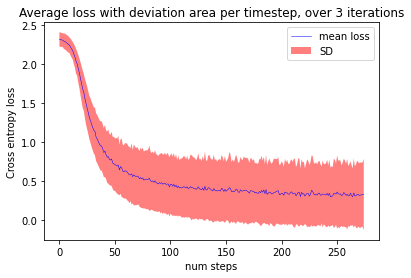

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

step = np.arange(len(loss_mean1))
fig, ax = plt.subplots(1)
ax.plot(array_mean, lw=.5, label='mean loss', color='blue')
ax.fill_between(step, (lb), (ub), label='SD', facecolor='red', alpha=0.5)

ax.set_title('Average loss with deviation area per timestep, over 3 iterations')
ax.legend(loc='upper right')
ax.set_xlabel('num steps')
ax.set_ylabel('Cross entropy loss')

In [28]:
# Q7 

# Load data
(xtrain, ytrain), (xtest, ytest), num_cls = load_mnist(final=True)

# Get non zero indexes
Non_zero_index = []
for index, number in enumerate(xtrain.max(axis=0)):
    if number != 0:
        Non_zero_index.append(index)
# Remove zero rows
xtrain = xtrain[:,Non_zero_index]

# Normalize train and validation set
xtrain = (xtrain - xtrain.min(axis=0))/(xtrain.max(axis=0) - xtrain.min(axis=0))

# One hot encode
ytrain_onehot = np.zeros((len(xtrain), 10))
for index, y in enumerate(ytrain):
    ytrain_onehot[index][y] = 1
# ytrain = ytrain_onehot

In [29]:
epoch = 1
batch_size = 1
learning_rate = .03
size = len(xtrain)
batches = size // batch_size


# Initialize parameters
parameters = initialize_parameters(len(xtrain[0]), 300, 10)
learning_rate = learning_rate
for e in range(epoch):
    permutation = np.random.permutation(size)

    xtrain = xtrain[permutation,:]
    ytrain = ytrain[permutation,:]
        
    for i in range(batches):
        ub = i * batch_size + batch_size
        lb = i * batch_size
        X = xtrain[lb:ub,:]
        Y = ytrain[lb:ub,:]
        context = Tforward(X, Y, parameters)
        context = Tbackward(X, Y, parameters, context, batch_size)

        parameters["W1"] = Tupdate(parameters["W1"], context["dW1"], learning_rate)
        parameters["b1"] = Tupdate(parameters["b1"], context["db1"], learning_rate)
        parameters["W2"] = Tupdate(parameters["W2"], context["dW2"], learning_rate)
        parameters["b2"] = Tupdate(parameters["b2"], context["db2"], learning_rate)



Loss test 1.6208039187414252
predictions: [7 2 1 ... 4 5 6]


<ipython-input-4-db2d09ffe11e>:13: RuntimeWarning: overflow encountered in exp
  sigx = 1/(1 + np.exp(-X))


In [30]:
ytrue = ytest
xtest = xtest[:,Non_zero_index]
xtest = (xtest - xtrain.min(axis=0))/(xtrain.max(axis=0) - xtrain.min(axis=0))

ytest_onehot = np.zeros((len(xtest), 10))
for index, y in enumerate(ytest):
    ytest_onehot[index][y] = 1
ytest = ytest_onehot

context = Tforward(xtest, ytest, parameters)
CrossEntropyLoss.Tforward(Y,  context["A2"].T)
predictions = np.argmax(context["A2"], axis=0)
equal_count = 0
for i in range(len(predictions)):
    if predictions[i] == ytrue[i]:
        equal_count += 1
accuracy = equal_count / len(predictions)
print(accuracy)


0.9507


<ipython-input-4-db2d09ffe11e>:13: RuntimeWarning: overflow encountered in exp
  sigx = 1/(1 + np.exp(-X))
